# Language Identification Natural Language Processing Project

## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load data

In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
data.head()

Text  language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch

In [4]:
data.shape

(22000, 2)

## Check Counts of Language

In [7]:
data['language'].value_counts()

Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: language, dtype: int64

## Visualize that how much language and how much sentences in dataset

In [15]:
#plt.figure(figsize=(20,20))
#sns.countplot(data['language'])

In [16]:
#data['Text'][3]

## Remove stopwards from sentences

In [19]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MoHaMeD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
ps = PorterStemmer()
corpus=[]
print(stopwords.word())
for i in range(len(data['Text'])):
    
    rev = re.sub("^[a-zA-Z]",' ', data['Text'][i]) 
    rev = rev.lower()
    rev = rev.split()
    rev = [ps.stem(word) for word in rev if set(stopwords.words())]
    rev = ' '.join(rev)
    corpus.append(rev)
    
    print(f"{i}")

AttributeError: 'WordListCorpusReader' object has no attribute 'word'

## Convert sentences into vector

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000)
X = cv.fit_transform(corpus).toarray()

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [21]:
X.shape

NameError: name 'X' is not defined

## LabelEncoding (Convert language name into 1,2,3....etc)

In [22]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y = label.fit_transform(data['language'])

In [23]:
y

array([ 4, 17, 19, ..., 16,  1, 14])

In [24]:
len(y)

22000

In [25]:
label.classes_

array(['Arabic', 'Chinese', 'Dutch', 'English', 'Estonian', 'French',
       'Hindi', 'Indonesian', 'Japanese', 'Korean', 'Latin', 'Persian',
       'Portugese', 'Pushto', 'Romanian', 'Russian', 'Spanish', 'Swedish',
       'Tamil', 'Thai', 'Turkish', 'Urdu'], dtype=object)

## Final data Looks like

In [27]:
data1 = pd.DataFrame(np.c_[corpus,y],columns=['Sentence','Language'])

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 0 and the array at index 1 has size 22000

In [26]:
data1

NameError: name 'data1' is not defined

## split data into training and testing

In [422]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [423]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17600, 10000), (4400, 10000), (17600,), (4400,))

## Define model

In [28]:
from sklearn.naive_bayes import MultinomialNB

In [29]:
classifier = MultinomialNB().fit(X_train,y_train)

NameError: name 'X_train' is not defined

## Test model on test data

In [446]:
pred = classifier.predict(X_test)

In [447]:
pred

array([10, 14, 20, ..., 19, 21, 17])

In [448]:
y_test

array([10, 14, 20, ..., 19, 21, 17])

## Evaluate

In [449]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))

0.923409090909091
[[193   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0  62   0  17 112   3   0   0   0   0   0   0   0   0   0   0   2   0
    0   0   1   0]
 [  0   0 202   3   0   2   0   0   0   0   1   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   1   0 199   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   2 171   1   0   0   0   0   0   0   0   0   0   1   0   0
    0   0   1   0]
 [  0   0   0   1   0 195   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   4   0   0 188   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   1   0   0   0 191   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0  12   0   8  88   3   0   0  65   0   0   0   0   0   1   1   3   1
    0   0   0   0]
 [  0   0   0   0   4   0   0   0   0 200   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0  11   0   1   0   0   0   0 186   0   

## Confusion matrix

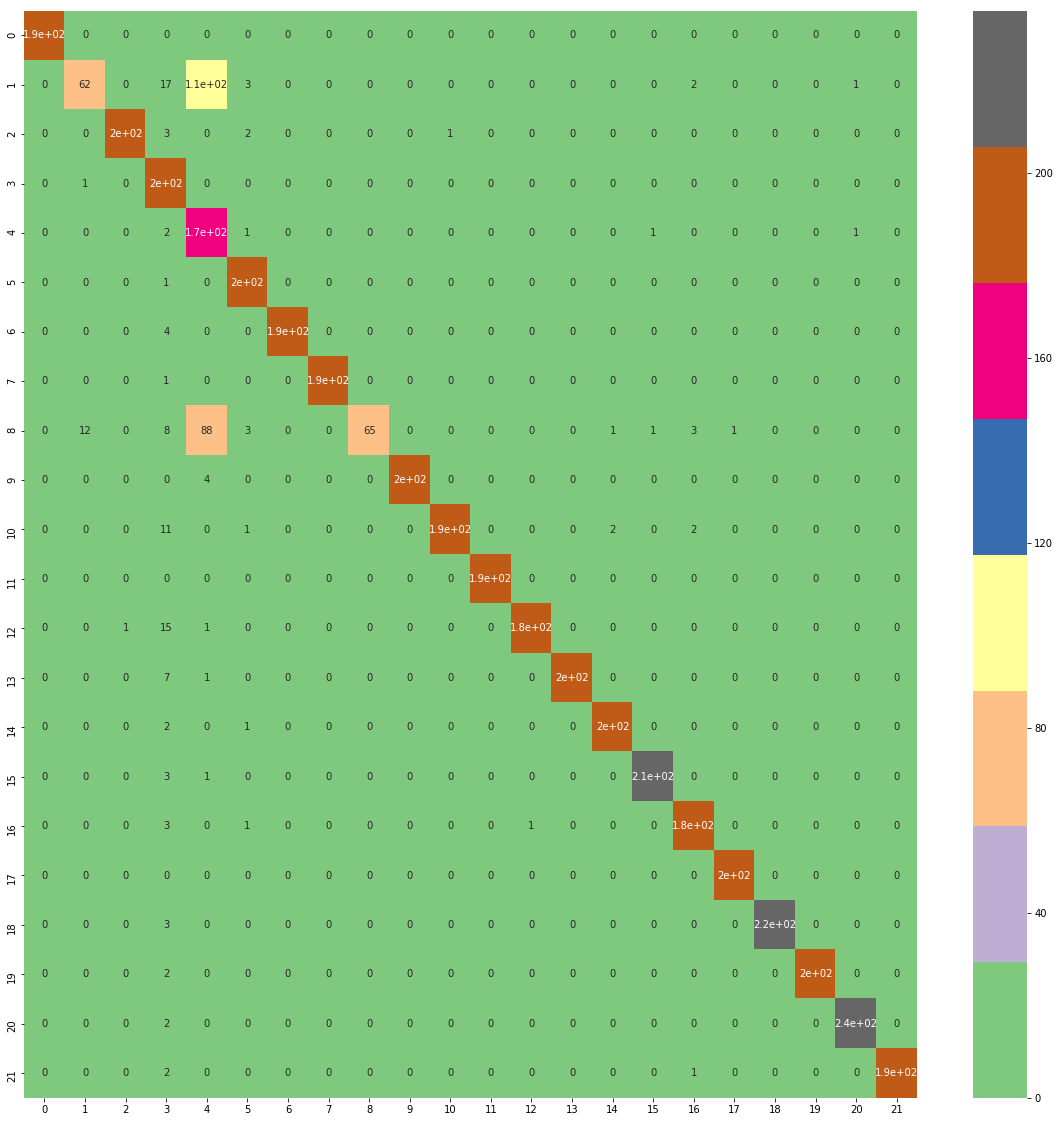

In [450]:
plt.figure(figsize=(20,20))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cmap=plt.cm.Accent)

## Actual Language and Predicted Language

In [451]:
fnl = pd.DataFrame(np.c_[y_test,pred],columns=['Actual','Predicted'])
fnl

Actual  Predicted
0         10         10
1         14         14
2         20         20
3         16         16
4         12         12
5          4          4
6         15         15
7          3          3
8         18         18
9          0          0
10         0          0
11         5          5
12         4          4
13         0          0
14        11         11
15         1          1
16         8          4
17         3          3
18        20         20
19         9          9
20         3          3
21        20         20
22        17         17
23         3          3
24        12         12
25        16         16
26         9          9
27         4          4
28         5          5
29         7          7
...      ...        ...
4370      18         18
4371       8          8
4372       7          7
4373       7          3
4374       0          0
4375      13         13
4376      17         17
4377       2          2
4378      15         15
4379      14         14
4380      17         17
4381      16         16
4382       3          3
4383      15         15
4384       9          9
4385      20         20
4386       3          3
4387       9          9
4388      12         12
4389      19         19
4390       9          9
4391      18         18
4392       5          5
4393      14         14
4394      19         19
4395      20         20
4396       1          4
4397      19         19
4398      21         21
4399      17         17

[4400 rows x 2 columns]

## Save model

In [17]:
import joblib

joblib.dump(classifier , 'language_identification.sav')

## Load model

In [18]:
model = joblib.load('language_identification.sav')

## Test model

In [21]:
def test_model(test_sentence):
    languages = {
    'Arabic' : 0,
    'Chinese' : 1,
    'Dutch' : 2,
    'English' : 3,
    'Estonian' : 4,
    'French' : 5,
    'Hindi' : 6,
    'Indonesian' : 7,
    'Japanese' : 8,
    'Korean' : 9,
    'Latin' : 10,
    'Persian' : 11,
    'Portugese' : 12,
    'Pushto' : 13,
    'Romanian' : 14,
    'Russian' : 15,
    'Spanish' : 16,
    'Swedish' : 17,
    'Tamil' : 18,
    'Thai' : 19,
    'Turkish' : 20,
    'Urdu' : 21
    }
    
    
    
    
    rev = re.sub('^[a-zA-Z]',' ',test_sentence)
    rev = rev.lower()
    rev = rev.split()
    rev = [ps.stem(word) for word in rev if word not in set(stopwords.words())]
    rev = ' '.join(rev)
    
    rev = cv.transform([rev]).toarray()
    
    output = model.predict(rev)[0]
    
    keys = list(languages)
    values = list(languages.values())
    position = values.index(output)
    
    output = keys[position]
    
    print(output)

In [23]:
# test_model('Tere kuidas sul läheb') # Estonian = > Correct

In [483]:
test_model('நாங்கள் நல்ல சிறுவர்கள்')  # Tamil => Correct

Tamil


In [484]:
test_model('พวกเราเป็นเด็กดี') # Thai => Correct

Thai


In [494]:
test_model('where are you') # English => Wrong

Estonian


In [495]:
test_model('İyi ki doğdun Raman') # Turkish = > Correct

Turkish


In [486]:
test_model('in quo habitas') # Latin => Correct

Latin


In [465]:
pd.DataFrame(np.c_[data['Text'],data['language'],y],columns=['Sentence','Language','Encoded'])

Sentence    Language Encoded
0      klement gottwaldi surnukeha palsameeriti ning ...    Estonian       4
1      sebes joseph pereira thomas  på eng the jesuit...     Swedish      17
2      ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...        Thai      19
3      விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...       Tamil      18
4      de spons behoort tot het geslacht haliclona en...       Dutch       2
5      エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運...    Japanese       8
6      tsutinalar i̇ngilizce tsuutina kanadada albert...     Turkish      20
7      müller mox figura centralis circulorum doctoru...       Latin      10
8      برقی بار electric charge تمام زیرجوہری ذرات کی...        Urdu      21
9      シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとrtマーティン高校に...    Japanese       8
10     kemunculan pertamanya adalah ketika mencium ka...  Indonesian       7
11     barocco pt escândalo de ª página é um filme fr...   Portugese      12
12     association de recherche et de sauvegarde de l...      French       5
13     胡赛尼本人和小说的主人公阿米尔一样，都是出生在阿富汗首都喀布尔，少年时代便离开了这个国家。胡...     Chinese       1
14     한국에서 성씨가 사용되기 시작한 정확한 시기는 알 수 없으나 한자漢字 등 중국 문물...      Korean       9
15     การฟาดฟันของบรรดาสาวงามในกองประกวด miss beauty...        Thai      19
16     dorota rabczewska artistinimega doda sündinud ...    Estonian       4
17     diante destes gerenciamentos podendo ser feito...   Portugese      12
18     besemer s van der geest v murray j bijleveld c...   Portugese      12
19     महाराष्ट्र  मई  को भारत का राज्य बनाया गया था।...       Hindi       6
20     ஆங்கில எழுத்துக்களை மட்டும் அல்லாமல் பன்மொழி எ...       Tamil      18
21     en navidad de  poco después de que interpretó ...     Spanish      16
22     la chirurgie comprenant principalement lablati...      French       5
23     dès les années  les communes voisines darnouvi...      French       5
24     merilai a maria-kristiina lotman toim  methis ...    Estonian       4
25     효모는 세포 수준의 생물학에서 모델 생물의 첫 번째 본보기로 간주해도 좋을 것이다 ...      Korean       9
26     au er avril  les services asama sont actuellem...      French       5
27     لویي په کالونیو کې د ظلم کولو خلاف وو او له خل...      Pushto      13
28     de prinses was als erfgename van polen een goe...       Dutch       2
29     آهن ترکیباتی را ایجاد می‌کند که عمدتاً در حالت...     Persian      11
30     lalimentation industrielle convient parfaiteme...      French       5
31     de-a lungul vieții watson a fost interesat de ...    Romanian      14
32     занимает пятое место в диптихе автокефальных п...     Russian      15
33     藤女の女性教師。歳。数学担当。風紀指導を担当しており、リコにとっては天敵。藤女とその伝統に強...    Japanese       8
34     walter kaudern dalam bukunya menyatakan wawo l...  Indonesian       7
35     imprimat psalterium quzhayae librum primum imp...       Latin      10
36     media [sc via] sive mese graece ἡ μέση [sc ὁδό...       Latin      10
37     in  johnson was awarded an american institute ...     English       3
38     attirant dans ses clubs les meilleurs joueurs ...      French       5
39     poço de jacó está localizado a  metros de tell...   Portugese      12
40     bussy-saint-georges has built its identity on ...     English       3
41     زلاتان ابراھیموویچ zlatan ibrahimović سویڈش تل...        Urdu      21
42     lock helen  "a mans story is his gris-gris" is...       Latin      10
43     bintang ini memiliki nama tradisional sulafat ...  Indonesian       7
44     dalam bahasa inggris istilah easter paskah men...  Indonesian       7
45     教会旋法はまず終止音（finalis）によってつに分類される。そしてそれぞれが音域（ambi...    Japanese       8
46     قبل عام بالضبط وبتاريخ  أعلن البغدادي خطة هدم ...      Arabic       0
47     ـــ په  رجب  هـ ق كال دوانت وايگل ولسوالي دجمچ...      Pushto      13
48     ia menikahi giacomina wafat  februari  putri u...  Indonesian       7
49     theokritos herdediktning har tjänat som förebi...     Swedish      17
50     deliège werd gemeenteraadslid  en burgemeester...       Dutch       2
51     много сделал для понимания деятельнос

In [470]:
# languages = {
#     'Arabic' : 0,
#     'Chinese' : 1,
#     'Dutch' : 2,
#     'English' : 3,
#     'Estonian' : 4,
#     'French' : 5,
#     'Hindi' : 6,
#     'Indonesian' : 7,
#     'Japanese' : 8,
#     'Korean' : 9,
#     'Latin' : 10,
#     'Persian' : 11,
#     'Portugese' : 12,
#     'Pushto' : 13,
#     'Romanian' : 14,
#     'Russian' : 15,
#     'Spanish' : 16,
#     'Swedish' : 17,
#     'Tamil' : 18,
#     'Thai' : 19,
#     'Turkish' : 20,
#     'Urdu' : 21
# }

# ThankYou!!!!!!!!!!!!